In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import truncnorm, uniform, norm
from glob import glob
import os, sys
from os import path

In [2]:
### CHANGE THIS TO YOUR LOCAL DIRECTORY ###
stats_dir = "/home/sajannr/rev02_ringmaps/trial_1"

# Get a list of all the stats files
fl_pattern = 'CSD_stats_out_fr{freq}.csv'
stats_files = glob(path.join(stats_dir, fl_pattern.format(freq = '*')))
print(len(stats_files))

1024


In [3]:
stats_files

['/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr961.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr628.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr160.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr527.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr963.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr503.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr381.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr48.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr656.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr663.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr739.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr634.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr54.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr476.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr806.csv',
 '/home/sajannr/rev02_ringm

In [4]:
# Sort the files by frequency index

def read_back_num(string):
    marker = len(string)-1
    while not string[marker].isdigit(): marker -= 1
    end = marker + 1
    while string[marker:end].isdigit(): marker -= 1
    return int(string[marker + 1:end])

stats_files.sort(key = read_back_num)

In [5]:
freqs = [read_back_num(fl) for fl in stats_files]

In [6]:
stats_files

['/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr0.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr1.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr2.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr3.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr4.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr5.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr6.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr7.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr8.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr9.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr10.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr11.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr12.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr13.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_out_fr14.csv',
 '/home/sajannr/rev02_ringmaps/trial_1/CSD_stats_o

In [6]:
# Alternatively, store the stats filenames in a dict
# Frequencies are the keys

stats_dict = {read_back_num(fl) : fl for fl in stats_files}

In [52]:
fr = 211

In [53]:

dat = pd.read_csv(stats_dict[fr], header = 0, sep = ',') #758 MHz

dat

CSD      mean    median     stdev       skew       kurtosis      zsum  \
0    2199.0 -0.000127  0.000486  0.878622 -54.728154  143341.781279  0.056889   
1    2183.0  0.002003  0.001077  0.864102   3.214902   32631.395979  0.060518   
2    2170.0  0.000751  0.000844  1.304443  -6.829616   34559.872103  0.046342   
3    1989.0 -0.001332 -0.001024  0.138889  -2.578776   25823.584765  0.263974   
4    2102.0  0.000673  0.000477  1.429742  -1.423487   35708.614922  0.044504   
..      ...       ...       ...       ...        ...            ...       ...   
368  2200.0  0.000476 -0.000228  0.800439  43.232634   14213.847618  0.068377   
369  1905.0  0.000494 -0.000243  0.231270 -15.076632   39637.728859  0.201313   
370  2272.0  0.000172 -0.000224  0.186997 -63.797872   55518.298059  0.248580   
371  2051.0  0.000049  0.000340  0.616343  12.536273   32266.459832  0.082542   
372  2225.0  0.000971  0.000680  0.460596  45.550948   82112.940238  0.100043   

      nonzero  
0    0.393555  
1    0.365723  
2    0.380859  
3    0.244141  
4    0.178955  
..        ...  
368  0.299316  
369  0.450195  
370  0.375488  
371  0.270996  
372  0.237305  

[373 rows x 8 columns]

In [16]:
dat.columns

Index(['CSD', 'mean', 'median', 'stdev', 'skew', 'kurtosis', 'zsum',
       'nonzero'],
      dtype='object')

In [11]:
for stat in stats_list:
    dat[stat] = np.array(stats[stat])

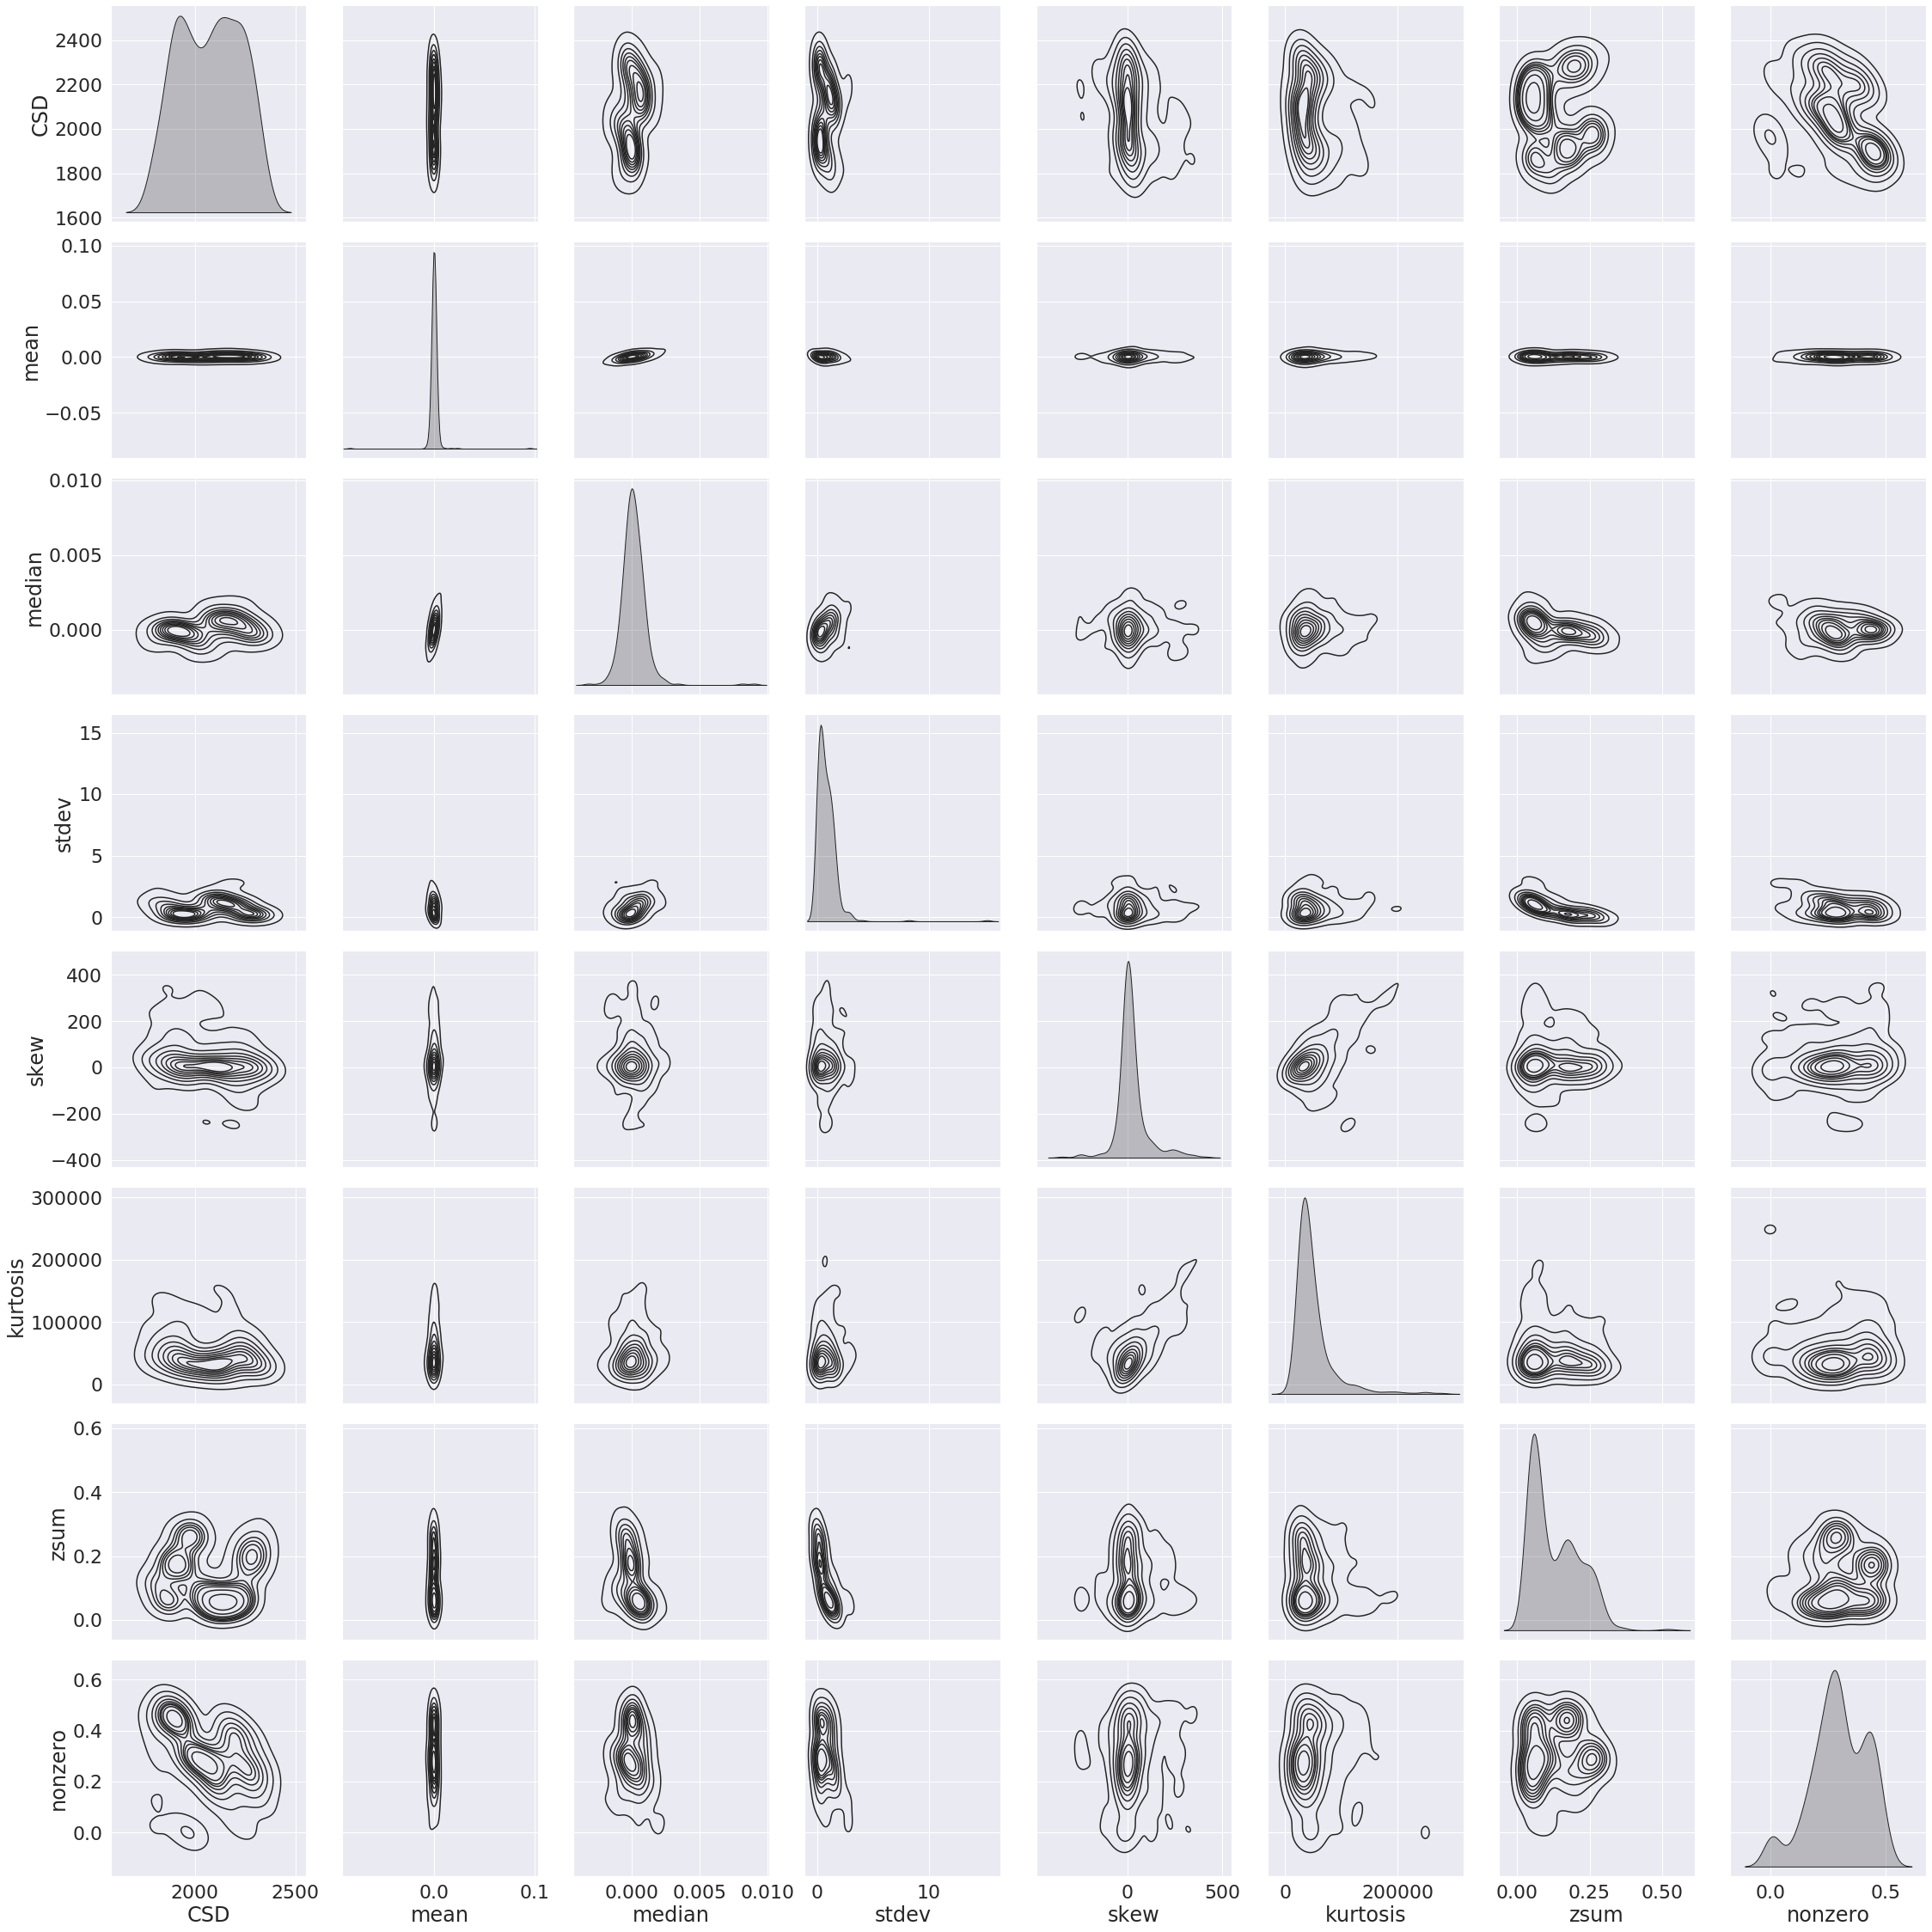

In [54]:
# KDE Plot

sns.set(font_scale=2, palette = 'gray')
sns.pairplot(dat, kind = 'kde', height = 4, aspect = 1)

In [21]:
# Helper functions

def single_gauss(x, sigma, mu, N):
    gauss = N*np.exp(-0.5*((x - mu)/sigma)**2)
    
    return gauss

def double_gauss(x, sigma_1, mu_1, N_1, sigma_2, mu_2, N_2):
    gauss_1 = single_gauss(x, sigma_1, mu_1, N_1)
    gauss_2 = single_gauss(x, sigma_2, mu_2, N_2)
    
    return gauss_1 + gauss_2

def log_normal(x, mu, sigma, N):
    return (N/(x))*np.exp(- (np.log((x - mu)**2))/(2*sigma**2))

In [27]:
dat[dat['nonzero'] > 0.01]

CSD      mean    median     stdev        skew      kurtosis      zsum  \
0    2199.0  0.002979  0.002427  0.931933   73.046774  29281.007094  0.096661   
1    2183.0  0.003597  0.002778  1.197213   81.919808  33469.235135  0.080863   
2    2170.0  0.001323  0.002355  1.320835   82.829893  35561.910891  0.075989   
4    1989.0 -0.005005 -0.001529  0.288579   90.699801  36772.583028  0.266337   
5    2102.0  0.005084  0.005088  1.310177   96.911308  42443.614816  0.090874   
..      ...       ...       ...       ...         ...           ...       ...   
316  2254.0  0.000266  0.001338  0.363683   61.295785  18485.720588  0.210467   
317  2200.0  0.001866  0.001660  0.759790   48.956856   6478.089340  0.125426   
318  2272.0  0.000593  0.000829  0.474676   61.793827  25392.238273  0.187044   
319  2051.0 -0.001043 -0.003303  0.996292  102.215136  41457.179544  0.110511   
321  2225.0  0.001190  0.002005  0.727349   82.071176  22045.167920  0.119755   

      nonzero  
0    0.556641  
1    0.545410  
2    0.466309  
4    0.235596  
5    0.196045  
..        ...  
316  0.518555  
317  0.476074  
318  0.596680  
319  0.257568  
321  0.547607  

[300 rows x 8 columns]

# Make a Bunch of Histograms of Stats

In [39]:
class DataPlotter:
    def __init__(self, data, n_bins = 100):
        self._data = data[data['nonzero'] > 0.01]
        self.n_bins = n_bins
        
    def plot_histogram(self, data_type):
        plt.hist(self._data[data_type], color = 'k', histtype = 'step', 
                 bins = self.n_bins, density = False)
        plt.xlabel(data_type)
        plt.ylabel('counts')
        plt.title(f'Histogram of {data_type} Data')
        
    def _histogram(self, data_type):
        data = self._data[data_type].to_numpy()
        data = data[~np.isnan(data)]
        n, bins = np.histogram(data, bins = self.n_bins, density = False)
        mid_bins = (bins[:-1] + bins[1:])/2
        return n, bins, mid_bins
    
    def gaussian_fit(self, data_type):
        n, bins, mid_bin = self._histogram(data_type)
        (sigma, mu, N), pcov = curve_fit(single_gauss, mid_bin, n, )
        return sigma, mu, N
    
    def plot_gaussian(self, data_type, xlim = None):
        n, bins, mid_bin = self._histogram(data_type)
        x = np.linspace(bins[0], bins[-1], 1000)
        self.plot_histogram(data_type)
        sigma, mu, N = self.gaussian_fit(data_type)
        plt.plot(x, single_gauss(x, sigma, mu, N), color = 'mediumvioletred', 
                 marker = '.', label = 'Gaussian Fit')
        if xlim:
            plt.xlim(xlim)
        plt.legend(loc = 'best')
        plt.show()
        
    def plot_outliers(self, data_type):
        self.plot_histogram(data_type)
        sigma, mu, N = self.gaussian_fit(data_type)
        
        label = r'%.3g $\pm$ 5$\sigma$'%(mu)+'\n'
        label += r'$\sigma$ = %.3g'%(sigma)
            
        plt.axvline(x = mu+5*sigma, color = 'mediumvioletred', 
                    label = label)
        plt.axvline(x = mu-5*sigma, color = 'mediumvioletred')
        plt.legend(loc = 'best')
        plt.show()
        
    def get_gaussian_outliers(self, data_type, thresh = 5):
        sigma, mu, n = self.gaussian_fit(data_type)
        print(sigma, mu, n)
        greater = self._data[['CSD', data_type]][self._data[data_type] >= mu+thresh*np.abs(sigma)]
        less = self._data[['CSD', data_type]][self._data[data_type] <= mu-thresh*np.abs(sigma)]
        return less, greater
        
        
        

In [55]:
sns.reset_orig()
DP = DataPlotter(dat)

# Mean

In [27]:
for a in less: print(a)

CSD
mean


In [48]:
CSD_outliers = {}

for freq in freqs:
    dat = pd.read_csv(stats_dict[freq], header = 0, sep = ',')
    if len(dat) == 0:
        continue
    DP = DataPlotter(dat)
    try:
        less, greater = DP.get_gaussian_outliers('mean')
    except Exception:
        continue
    for csd in less['CSD']:
        if csd in CSD_outliers:
            CSD_outliers[csd].append(freq)
        else:
            CSD_outliers[csd] = [freq]
    for csd in greater['CSD']:
        if csd in CSD_outliers:
            CSD_outliers[csd].append(freq)
        else:
            CSD_outliers[csd] = [freq]

/cvmfs/soft.computecanada.ca/easybuild/software/2017/Core/scipy-stack/2019b/lib/python3.8/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


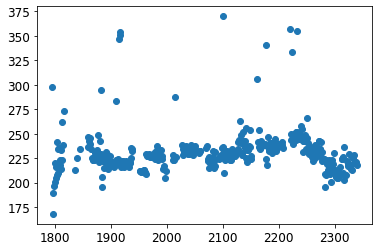

In [49]:
x = []
y = []
for csd in CSD_outliers.keys():
    x.append(csd)
    y.append(len(CSD_outliers[csd]))
x = np.array(x)
y = np.array(y)
plt.scatter(x[mask], y[mask])

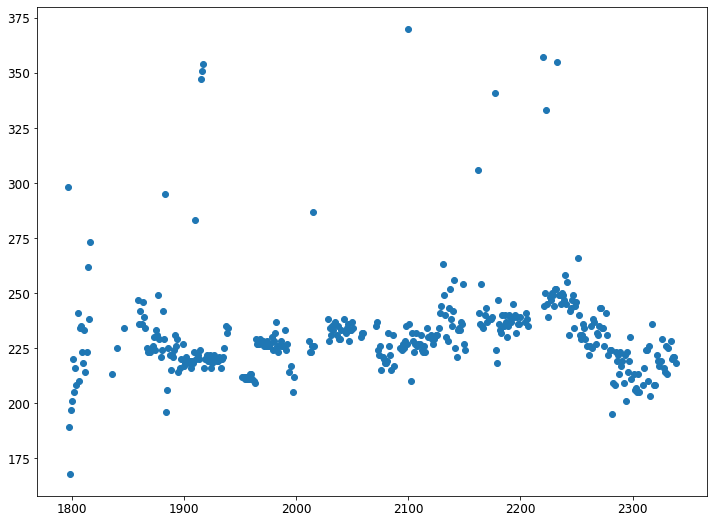

In [65]:
fig = plt.figure(figsize = (12, 9))
plt.scatter(x, y)
plt.xlabel('CSD')
plt.ylabel('Counts of Bad Frequencies')
plt.title('Plot of Bad Day vs Freq')
plt.show()


In [57]:
for csd in dat['CSD']:
    if not(csd in x):
        print(csd)

2027.0
2026.0


In [59]:
dat[dat['CSD'] == 2027.0]

CSD  mean  median  stdev  skew  kurtosis  zsum  nonzero
62  2027.0   NaN     NaN    NaN   0.0      -3.0   NaN      0.0

In [51]:
x[np.argmin(y)]

1798.0

In [50]:
x[y>275]

array([1916., 1796., 2223., 2162., 1915., 1883., 2220., 2015., 1917.,
       2100., 1910., 2177., 2233.])

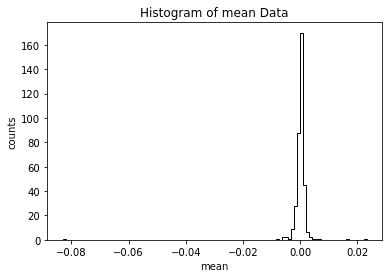

(0.0007931053838574338, 0.0002960808424011961, 171.6757762800639)


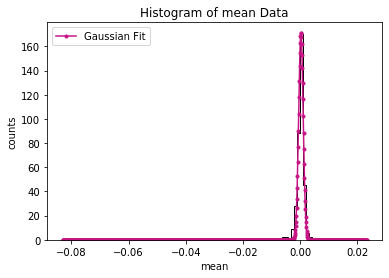

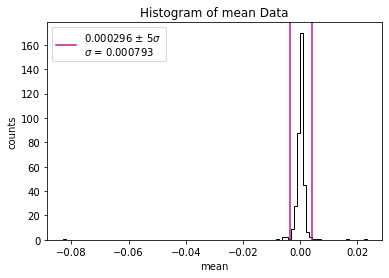

In [56]:
DP.plot_histogram('mean')
plt.show()
print(DP.gaussian_fit('mean'))
DP.plot_gaussian('mean')
DP.plot_outliers('mean')

In [57]:
less, greater = DP.get_gaussian_outliers('mean')
print(less)
print(greater)

0.0007931053838574338 0.0002960808424011961 171.6757762800639
        CSD      mean
50   2251.0 -0.005131
53   2141.0 -0.005688
113  1804.0 -0.005924
125  1883.0 -0.007525
308  2015.0 -0.004980
331  2233.0 -0.083107
        CSD      mean
75   2162.0  0.006872
98   1915.0  0.005962
140  1916.0  0.016857
307  2220.0  0.004980
323  1917.0  0.023382


# Median

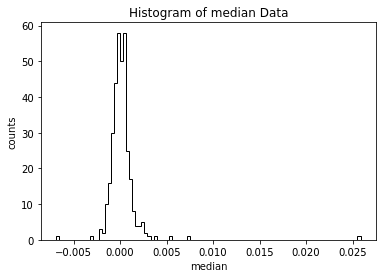

(0.0007347743415048073, 2.272623732530277e-05, 57.59015843141285)


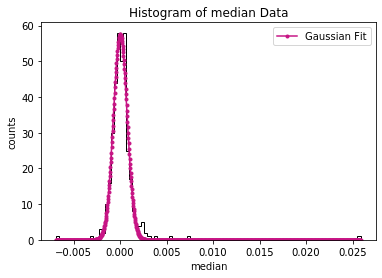

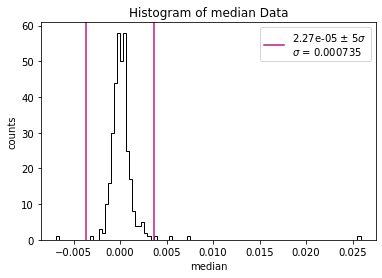

      CSD    median
104  2247 -0.006867
      CSD    median
50   2289  0.007474
120  1881  0.025850
150  2298  0.003743
193  2287  0.005291


In [33]:
data_type = 'median'
DP.plot_histogram(data_type)
plt.show()
print(DP.gaussian_fit(data_type))
DP.plot_gaussian(data_type)
DP.plot_outliers(data_type)
less, greater = DP.get_gaussian_outliers(data_type)
print(less)
print(greater)

# Skew

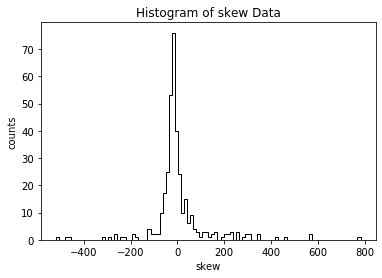

(19.80735967505541, -19.30603450923743, 65.4884672254541)


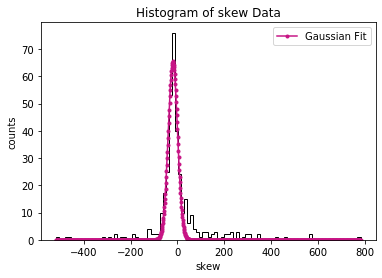

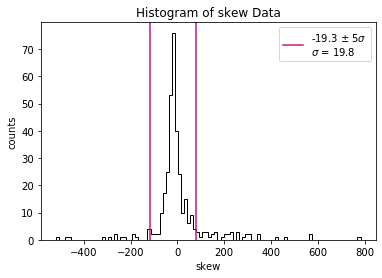

      CSD        skew
18   1920 -186.019426
22   2045 -223.998945
81   2257 -517.776009
85   2046 -266.331901
100  2244 -126.449837
102  2255 -473.776414
136  2221 -122.027929
143  2252 -462.915067
150  2298 -289.248303
193  2287 -122.781886
235  2286 -242.389560
257  1892 -171.909258
305  1913 -191.029526
315  2096 -264.769459
316  2246 -311.424299
      CSD        skew
4    2102  418.750835
32   2151   84.364837
40   2060  156.440197
48   1963  289.310951
50   2289  782.165741
56   2028  284.152345
57   2197  226.865703
67   2162  118.342905
86   1915  120.719185
96   2074   90.014269
103  2106  288.351557
104  2247  463.078408
106  2011  217.253053
107  2187  108.964769
126  1902  102.380896
164  2184  124.050537
166  1987  350.971942
176  2285  206.288851
181  1965  230.651725
188  2034  207.097537
202  2181  110.987825
206  2047  255.602700
215  1997  222.240038
220  1958  226.093297
221  1956  249.362236
225  1904  134.359904
227  2180   84.804098
230  2204   79.820089
231  1974 

In [34]:
data_type = 'skew'
DP.plot_histogram(data_type)
plt.show()
print(DP.gaussian_fit(data_type))
DP.plot_gaussian(data_type)
DP.plot_outliers(data_type)
less, greater = DP.get_gaussian_outliers(data_type)
print(less)
print(greater)

# Standard Deviation

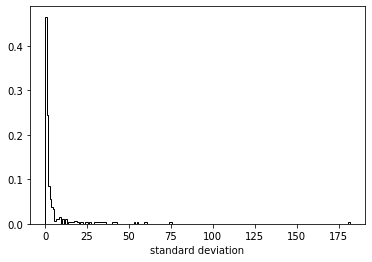

In [6]:
(n, bins, _) = plt.hist(dat['stdev'], color = 'k', histtype = 'step', bins = 200, density = True)
plt.xlabel('standard deviation')

mid_bin = (bins[:-1] + bins[1:])/2
x = np.linspace(bins[0], bins[-1], 100)

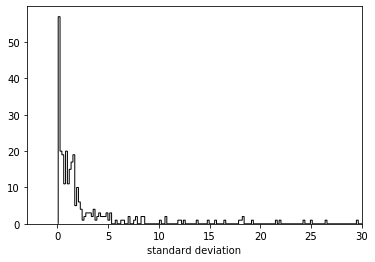

In [22]:
(n, bins, _) = plt.hist(dat['stdev'], color = 'k', histtype = 'step', bins = 1000)
plt.xlim((-3, 30))
plt.xlabel('standard deviation')

mid_bin = (bins[:-1] + bins[1:])/2
x = np.linspace(bins[0], bins[-1], 100)

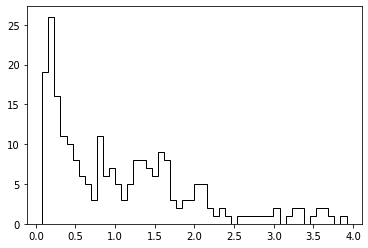

In [19]:
std = dat['stdev'][dat['stdev'] < 4]
(n, bins, _) = plt.hist(std, color = 'k', histtype = 'step', bins = 50)
plt.show()

In [132]:
# (sigma_1, mu_1, N_1), pcov = curve_fit(single_gauss, mid_bin, n, maxfev=1000, p0 = [15, 5, 0.25])

# sigma_1, mu_1, N_1

mu, sig = norm.fit(dat['stdev'])

mu, sig

(4.449064777420593, 13.347898719024773)

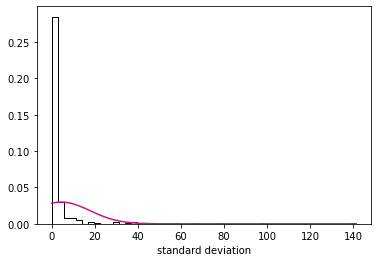

In [134]:
fig = plt.figure()
# plt.plot(mid_bin, n, color = 'gray')
plt.hist(dat['stdev'], color = 'k', histtype = 'step', bins = 50, density = True)
# plt.plot(x, single_gauss(x, sigma_1, mu_1, N_1), color = 'mediumvioletred')
plt.plot(x, norm.pdf(x, mu, sig), color = 'mediumvioletred')
plt.xlabel('standard deviation')
fig.savefig('stat_distributions/stdev_v2.png', bbox_inches = 'tight')

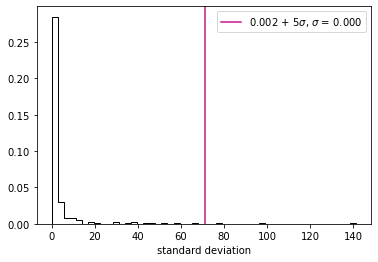

In [135]:
fig = plt.figure()
# plt.plot(mid_bin, n, color = 'gray')
plt.hist(dat['stdev'], color = 'k', histtype = 'step', bins = 50, density = True)
plt.axvline(x = mu + 5*sig, color = 'mediumvioletred', label = r'%.3f + 5$\sigma$, $\sigma$ = %.3f'%(out[2], out[3]))
plt.legend(loc = 'best')
plt.xlabel('standard deviation')
fig.savefig('stat_distributions/stdev_5sig_v2.png', bbox_inches = 'tight')

In [136]:
#outliers
dat.CSD[dat['stdev'] >= mu + 5*sig]

17     1883
165    2100
220    2173
Name: CSD, dtype: int64

# Skew

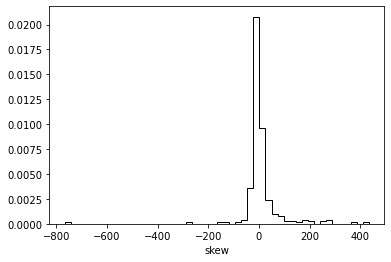

In [104]:
(n, bins, _) = plt.hist(dat['skew'], color = 'k', histtype = 'step', bins = 50, density = True)
plt.xlabel('skew')

mid_bin = (bins[:-1] + bins[1:])/2
x = np.linspace(bins[0], bins[-1], 100)

In [105]:
(sigma_1, mu_1, N_1), pcov = curve_fit(single_gauss, mid_bin, n, p0 = [10,0,0.02])

sigma_1, mu_1, N_1

(15.430458210394265, -5.912147884901571, 0.021660524717805982)

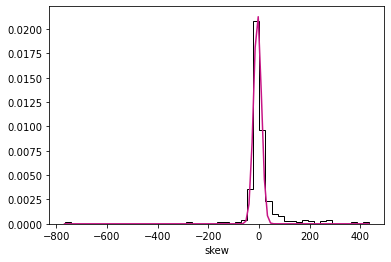

In [106]:
fig = plt.figure()
# plt.plot(mid_bin, n, color = 'gray')
plt.hist(dat['skew'], color = 'k', histtype = 'step', bins = 50, density = True)
plt.plot(x, single_gauss(x, sigma_1, mu_1, N_1), color = 'mediumvioletred')
plt.xlabel('skew')
fig.savefig('stat_distributions/skew_v2.png', bbox_inches = 'tight')

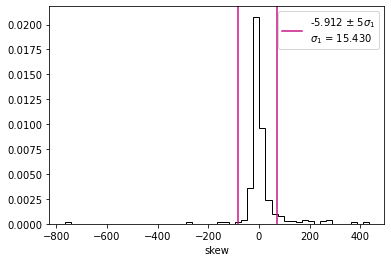

In [96]:
fig = plt.figure()
plt.hist(dat['skew'], color = 'k', histtype = 'step', bins = 50, density = True)
plt.axvline(x = mu_1+5*sigma_1, color = 'mediumvioletred', label = r'%.3f $\pm$ 5$\sigma_1$'%(mu_1)+'\n'+
            '$\sigma_1$ = %.3f'%(sigma_1))
plt.axvline(x = mu_1-5*sigma_1, color = 'mediumvioletred')
plt.xlabel('skew')
plt.legend(loc = 'best')
fig.savefig('stat_distributions/skew_5sig_v2.png', bbox_inches = 'tight')

In [98]:
#outliers
dat.CSD[dat['skew'] >= mu_1+5*sigma_1], dat.CSD[dat['skew'] <= mu_1-5*sigma_1]

(37     1904
 75     1955
 77     1957
 78     1958
 83     1963
 94     1974
 113    1994
 115    1997
 117    1999
 124    2028
 142    2060
 180    2117
 208    2151
 209    2162
 232    2187
 233    2188
 280    2287
 281    2288
 282    2289
 289    2304
 291    2306
 292    2309
 297    2314
 Name: CSD, dtype: int64,
 80     1960
 161    2096
 170    2105
 253    2245
 283    2291
 Name: CSD, dtype: int64)

# Kurtosis

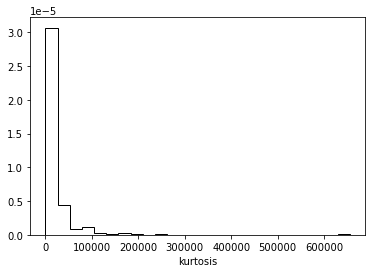

In [137]:
(n, bins, _) = plt.hist(dat['kurtosis'], color = 'k', histtype = 'step', bins = 25, density = True)
plt.xlabel('kurtosis')

mid_bin = (bins[:-1] + bins[1:])/2
x = np.linspace(bins[0], bins[-1], 100)

In [138]:
# out = truncnorm.fit(dat['kurtosis'])
# out

mu, sig = norm.fit(dat['kurtosis'])

mu, sig

# (sigma_1, mu_1, N_1), pcov = curve_fit(single_gauss, mid_bin, n, p0 = [5e4, 2e4, 5e-5])

# sigma_1, mu_1, N_1

(19167.782769230475, 48100.34501725837)

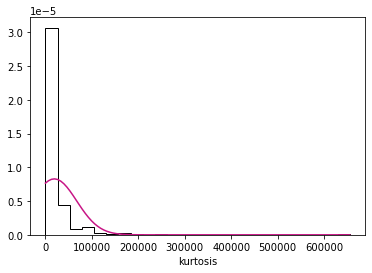

In [139]:
fig = plt.figure()
# plt.plot(mid_bin, n, color = 'gray')
plt.hist(dat['kurtosis'], color = 'k', histtype = 'step', bins = 25, density = True)
plt.plot(x, norm.pdf(x, mu, sig), color = 'mediumvioletred')
# plt.plot(x, truncnorm.pdf(x, *out), color = 'mediumvioletred')
plt.xlabel('kurtosis')
fig.savefig('stat_distributions/kurtosis_v2.png', bbox_inches = 'tight')

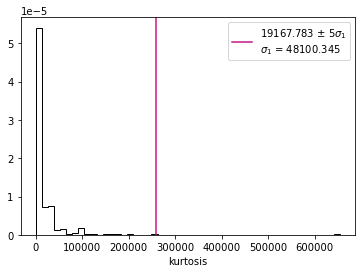

In [141]:
fig = plt.figure()
plt.hist(dat['kurtosis'], color = 'k', histtype = 'step', bins = 50, density = True)
plt.axvline(x = mu+5*sig, color = 'mediumvioletred', label = r'%.3f $\pm$ 5$\sigma_1$'%(mu)+'\n'+
            '$\sigma_1$ = %.3f'%(sig))
plt.xlabel('kurtosis')
plt.legend(loc = 'best')
fig.savefig('stat_distributions/kurtosis_5sig_v2.png', bbox_inches = 'tight')

In [143]:
#outliers
dat.CSD[dat['kurtosis'] >= mu+5*sig]

283    2291
Name: CSD, dtype: int64

# Zsum

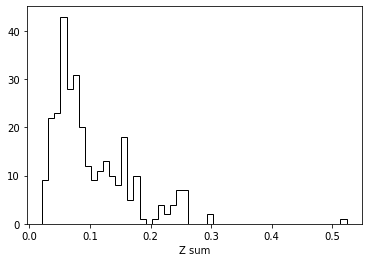

In [16]:
(n, bins, _) = plt.hist(dat.zsum, color = 'k', histtype = 'step', bins = 50)
plt.xlabel('Z sum')

mid_bin = (bins[:-1] + bins[1:])/2
x = np.linspace(bins[0], bins[-1], 100)

In [146]:
(sigma_1, mu_1, N_1), pcov = curve_fit(single_gauss, mid_bin, n)

sigma_1, mu_1, N_1

(0.07103932627351829, 0.03898577674708134, 8.740383909608509)

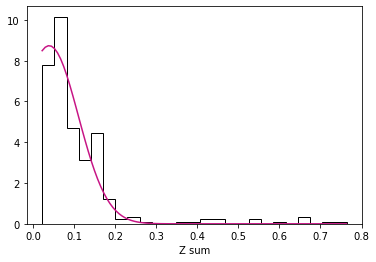

In [149]:
fig = plt.figure()
# plt.plot(mid_bin, n, color = 'gray')
plt.hist(dat.zsum, color = 'k', histtype = 'step', bins = 25, density = True)
plt.plot(x, single_gauss(x, sigma_1, mu_1, N_1), color = 'mediumvioletred')
# plt.plot(x, truncnorm.pdf(x, *out), color = 'mediumvioletred')
plt.xlabel('Z sum')
fig.savefig('stat_distributions/zsum_v2.png', bbox_inches = 'tight')

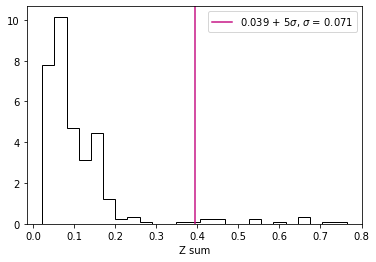

In [150]:
fig = plt.figure()
# plt.plot(mid_bin, n, color = 'gray')
plt.hist(dat['zsum'], color = 'k', histtype = 'step', bins = 25, density = True)
plt.axvline(x = mu_1 + 5*sigma_1, color = 'mediumvioletred', label = r'%.3f + 5$\sigma$, $\sigma$ = %.3f'%(mu_1, sigma_1))
plt.legend(loc = 'best')
plt.xlabel('Z sum')
fig.savefig('stat_distributions/zsum_5sig_v2.png', bbox_inches = 'tight')

In [152]:
#outliers
dat.CSD[dat.zsum >= mu_1+5*sigma_1]

43     1910
48     1915
49     1916
59     1927
78     1958
189    2130
238    2193
255    2247
256    2252
280    2287
281    2288
283    2291
284    2292
Name: CSD, dtype: int64

## Visualizing Ringmaps 

In [9]:
import ringmap_statistics_spring_2021 as ringmaps

In [48]:
day_map = ringmaps.RingMap(1915)

In [11]:
template = ringmaps.RingMap(median_subtract = True)

In [49]:
ringmaps.ringmap_stats(template, day_map, fr, all_plots = True)

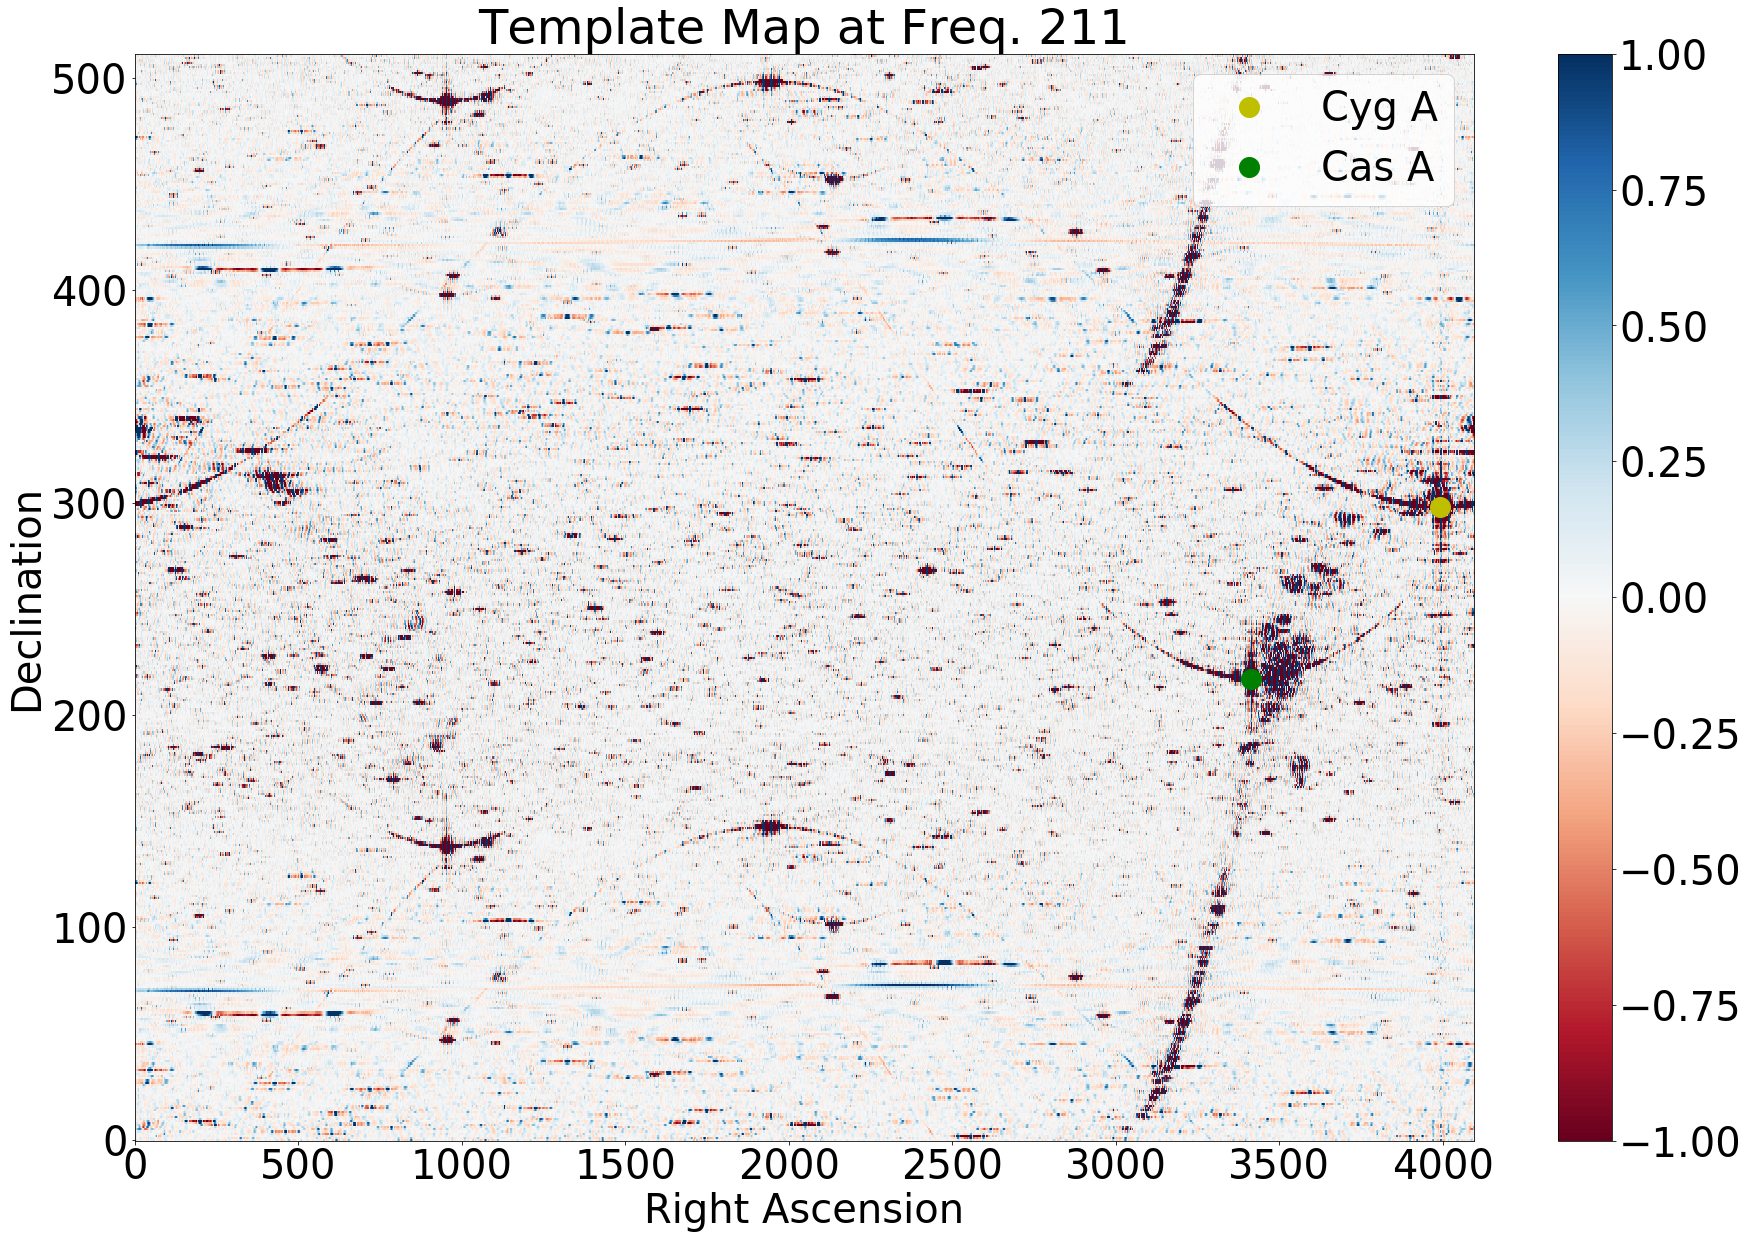

In [51]:
template.plot_map(211)